<a href="https://colab.research.google.com/github/udula27/Logistic-Regression-using-SciKit-Learn-module/blob/main/Linear_models_for_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import pandas as pd

iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [2]:
#Get the feature names
feature_names = iris.feature_names
print("Feature names: ", feature_names)

#get target names(classes)
class_names = iris.target_names
print("Class names: ", class_names)

Feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Class names:  ['setosa' 'versicolor' 'virginica']


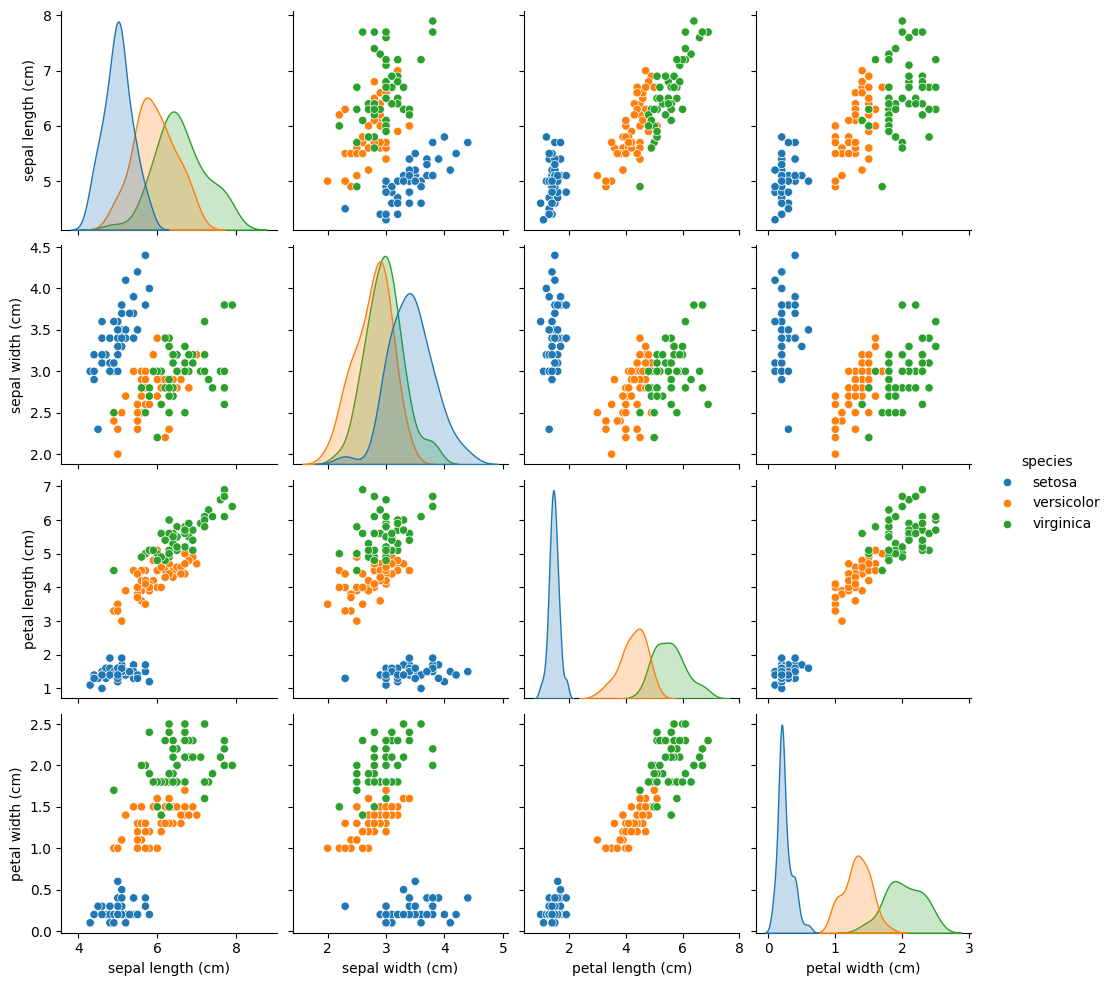

In [3]:
#creating a dataframe using iris
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

#seaborn pairplot
sns.pairplot(data = iris_df, diag_kind='kde', hue = 'species')
plt.show()

In [4]:
X = iris.data
print(X.shape)

(150, 4)


In [5]:
#taking only the first 2 features
X = iris.data[:,:2]
Y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

#initiating logistic regression model
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

#predicting values using the test data
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average = 'weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("Confusion Matrix: \n", conf_matrix)

Accuracy:  0.9
Precision:  0.9013888888888889
Recall:  0.9
F1 Score:  0.8992327365728899
Confusion Matrix: 
 [[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


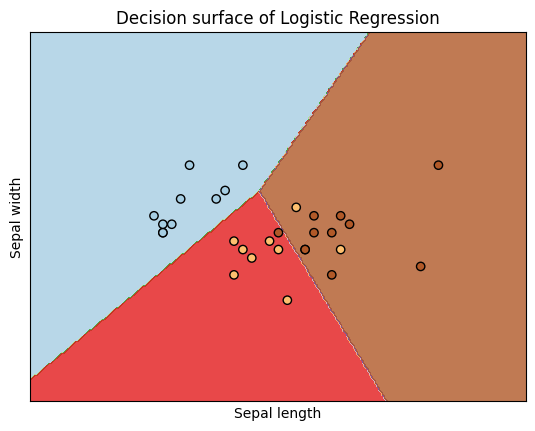

In [7]:
#creating a meshgrid to plot the decision boundary
# Create a meshgrid to plot the decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain predictions for each point in the meshgrid
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a contour plot for the decision boundary
plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors="k", cmap=plt.cm.Paired)

plt.title("Decision surface of Logistic Regression")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.xticks(())
plt.yticks(())

plt.show()

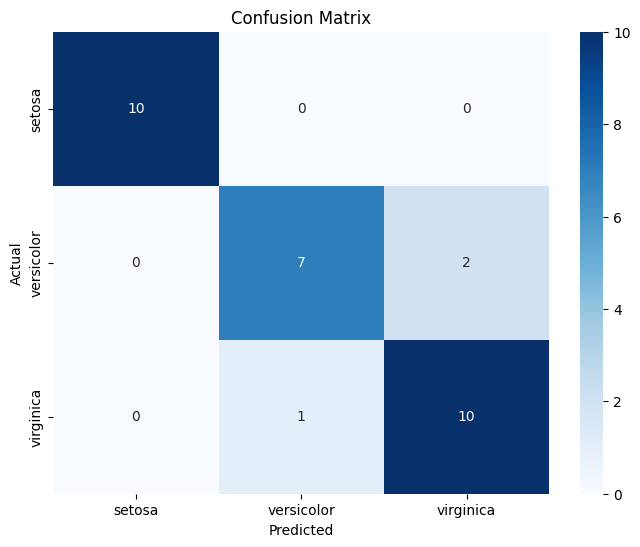

In [8]:
#calculating the confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)

class_names = iris.target_names
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [9]:
#using a new instance of the LogisticRegression classifier

X = iris.data
Y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

logreg = LogisticRegression(C=1e5)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


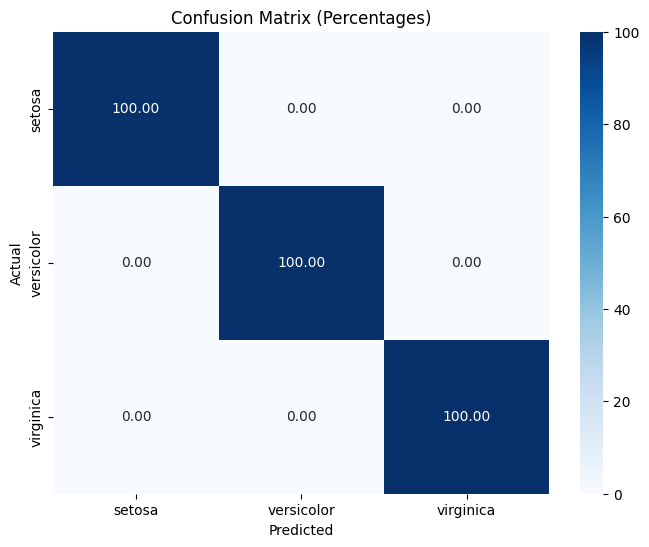

In [12]:
#calculating confusion matrix percentages

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percentages = conf_matrix/conf_matrix.sum(axis =1, keepdims = True)* 100

#plot confusion matrix using a heatmap

class_names = iris.target_names
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_percentages, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Percentages)')

plt.show()

In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [14]:
import pandas as pd
import io
from google.colab import files

uploaded = files.upload()

Saving attachment_default.csv to attachment_default.csv


In [15]:
df = pd.read_csv(io.BytesIO(uploaded['attachment_default.csv']))

df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


Text(0, 0.5, 'Income')

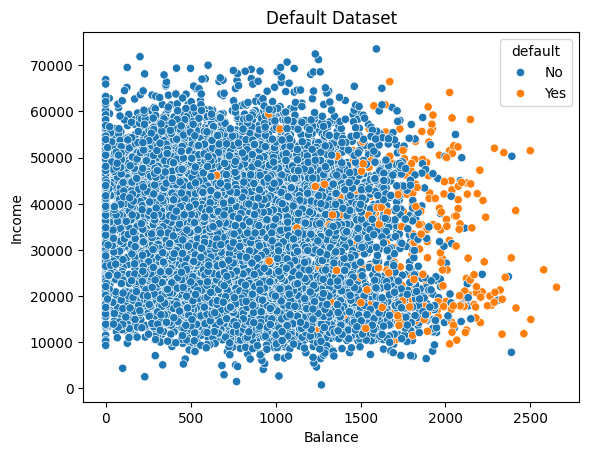

In [16]:
sns.scatterplot(x="balance", y='income', hue='default', data=df)
plt.title('Default Dataset')
plt.xlabel('Balance')
plt.ylabel('Income')


Text(32.91790123456788, 0.5, 'Income')

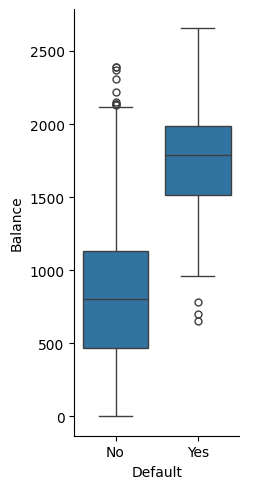

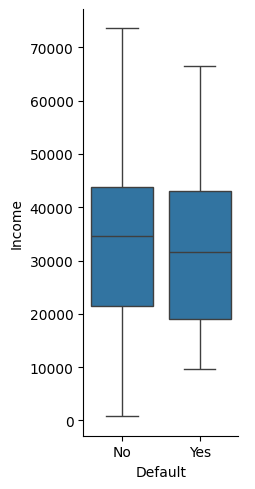

In [17]:
sns.catplot(x='default', y = 'balance', kind='box', aspect=0.5, data = df)
plt.xlabel('Default')
plt.ylabel('Balance')

sns.catplot(x='default', y = 'income', kind='box', aspect=0.5, data = df)
plt.xlabel('Default')
plt.ylabel('Income')

In [18]:
df.replace(['Yes','No'], [1,0], inplace = True)

y = df[['default']]

#adding a column of 1s to proceed to logistic regression
X = sm.add_constant(df[['balance']])

print(X.head())
log_reg_sm = sm.Logit(y,X).fit()

print(log_reg_sm.summary())


   const      balance
0    1.0   729.526495
1    1.0   817.180407
2    1.0  1073.549164
3    1.0   529.250605
4    1.0   785.655883
Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Thu, 07 Nov 2024   Pseudo R-squ.:                  0.4534
Time:                        16:07:10   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------

<ipython-input-18-5c0351853cad>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(['Yes','No'], [1,0], inplace = True)


In [19]:
y_pred = log_reg_sm.predict(X)

np.mean((y_pred>0.5)*1 == y['default'])



0.9725